Henter inn statistikk over basketballspiller i NBA fra 2021-2022 sesongen.

In [3]:
import pandas as pd
import numpy as np
url = 'https://basketball.realgm.com/nba/stats'
df = pd.read_html(url, header = 0)
df

[                7:00 PM ET             7:00 PM ET.1             7:00 PM ET.2
 0           Dallas (47-29)                       at        Cleveland (42-33)
 1                      NaN                      NaN                      NaN
 2  Preview  Regular Season  Preview  Regular Season  Preview  Regular Season,
 Empty DataFrame
 Columns: [Preview  Regular Season, Preview  Regular Season.1, Preview  Regular Season.2, Preview  Regular Season.3, Preview  Regular Season.4]
 Index: [],
                 7:00 PM ET             7:00 PM ET.1             7:00 PM ET.2
 0           Denver (45-31)                       at          Indiana (25-51)
 1                      NaN                      NaN                      NaN
 2  Preview  Regular Season  Preview  Regular Season  Preview  Regular Season,
 Empty DataFrame
 Columns: [Preview  Regular Season, Preview  Regular Season.1, Preview  Regular Season.2, Preview  Regular Season.3, Preview  Regular Season.4]
 Index: [],
                 7:00 PM ET 

Ser på antall tabeller det er på nettsiden

In [4]:
len(df)


13

Velger den 10. tabellen, ettersom denne inneholder statistikken over de 100 beste spillerene så langt i sesongen.

In [7]:
df[12]

,#,Player,Team,GP,MPG,PPG,FGM,FGA,FG%,3PM,...,FTA,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
0,1,LeBron James,LAL,55,37.2,30.1,11.4,21.8,0.523,2.9,...,5.9,0.756,1.1,7.1,8.2,6.3,1.3,1.1,3.5,2.1
1,2,Giannis Antetokounmpo,MIL,62,32.8,29.9,10.3,18.6,0.552,1.1,...,11.5,0.722,2.0,9.7,11.6,5.8,1.0,1.5,3.2,3.2
2,3,Joel Embiid,PHI,62,33.5,29.9,9.5,19.4,0.489,1.4,...,11.7,0.816,2.1,9.3,11.4,4.3,1.2,1.4,3.0,2.7
3,4,Kevin Durant,BRK,48,36.7,29.5,10.5,20.2,0.519,1.9,...,7.2,0.905,0.5,6.7,7.2,6.1,0.9,0.9,3.4,2.0
4,5,Trae Young,ATL,69,35.0,28.0,9.3,20.2,0.458,3.0,...,7.1,0.902,0.7,3.1,3.8,9.6,1.0,0.1,4.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Cameron Johnson,PHX,60,26.3,12.8,4.3,9.2,0.475,2.6,...,1.7,0.873,0.6,3.5,4.1,1.5,0.8,0.2,0.6,1.7
96,97,Coby White,CHI,56,27.5,12.8,4.6,10.6,0.439,2.2,...,1.5,0.859,0.3,2.8,3.1,3.0,0.5,0.2,1.1,2.2
97,98,Kentavious Caldwell-Pope,WAS,72,30.3,12.8,4.5,10.5,0.424,2.0,...,2.1,0.886,0.5,2.9,3.4,1.9,1.1,0.3,1.2,1.8
98,99,Monte Morris,DEN,70,29.8,12.7,5.1,10.4,0.487,1.7,...,1.1,0.857,0.3,2.7,3.0,4.4,0.7,0.2,1.0,1.2


Lagrer denne som en tabell og ser på strukturen av denne.

In [8]:
df2021 = df[12]

In [9]:
df2021.shape

(100, 23)

Plotter med poeng per kamp på x-aksen og poengforsøk per kamp på y-aksen.

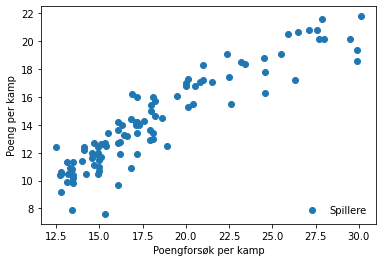

In [10]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

ax.set_ylabel('Poeng per kamp')
ax.set_xlabel('Poengforsøk per kamp')

ax.scatter(df2021['PPG'], df2021['FGA'],  label='Spillere')
ax.legend(loc='lower right',frameon=False)

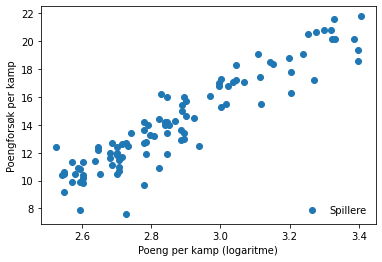

In [11]:
fig,ax=plt.subplots()

ax.set_ylabel('Poengforsøk per kamp')
ax.set_xlabel('Poeng per kamp (logaritme)')


ax.scatter(np.log(df2021['PPG']), df2021['FGA'],  label='Spillere')
ax.legend(loc='lower right',frameon=False)

Grafen viser et tydelig sammenheng mellom poengforsøk og poeng per kamp. De spillerene som forsøker å skåre flere poeng ender ofte opp med å skåre mange poeng i snitt.

Lagrer verdiene for poengforsøk per kamp og poeng per kamp som to egne variabler, y og x

In [ ]:
y=df2021['FGA']
pd.DataFrame(y)

,FGA
0,21.8
1,18.6
2,19.4
3,20.2
4,20.2
...,...
95,9.2
96,10.6
97,10.5
98,10.4


In [ ]:
x=pd.DataFrame(np.log(df2021['PPG']))
x['intercept']=1
x

,PPG,intercept
0,3.404525,1
1,3.397858,1
2,3.397858,1
3,3.384390,1
4,3.332205,1
...,...,...
95,2.549445,1
96,2.549445,1
97,2.549445,1
98,2.541602,1


Lager en lineær regresjonsmoddel og plotter denne med verdiene for poeng per kamp omgjort til logaritmiske verdier

In [ ]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


                            OLS Regression Results                            
Dep. Variable:                    FGA   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     630.0
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.83e-44
Time:                        10:24:41   Log-Likelihood:                -163.62
No. Observations:                 100   AIC:                             331.2
Df Residuals:                      98   BIC:                             336.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PPG           13.1245      0.523     25.100      0.0

In [ ]:
res.params

PPG          13.124536
intercept   -23.530878
dtype: float64

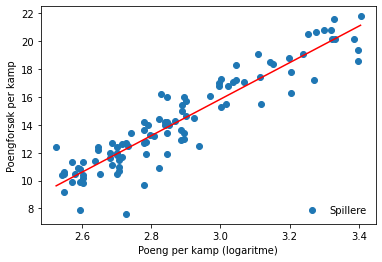

In [16]:
x=np.linspace(min(np.log(df2021['PPG'])), max(np.log(df2021['PPG'])), 100)

regression_line=res.params['intercept']+res.params['PPG']*x

ax.plot(x, regression_line,color='red')
fig

Når en lineær regresjonslinje tegnes ser vi at det er et klart sammenheng mellom de to statistiske variablene. Antall poeng per kamp er avhengig av poengforsøk per kamp. De spillerene som har flest poeng har også flest poengforsøk, med noen tilfeller der det ikke stemmer helt. Alle observasjonene er relativt nært regresjonslinja og linja har poisitivt stigningstall.